### EXERCISE 08.1-08.2


The goal of these two excercises is to find the value of the energy and the eigenfunction of the ground state of an hamiltonian whose potential is
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
This 1D problem is not solvable analytically and, indeed, must be solved numerically.

The approch to the problem is to consider the ground state eigenfunction as the sum of two normal distributions.

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

This choice comes naturally since the potential is formed by two holes. Subsequently it must varyed the center and the variance of the two Gaussians in order to find the best state that allows to calculate the lowest value of the energy. Like all variational methods, the expecation value it will be larger than the energy of the ground state.

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$


The state is sampled with the Metropolis Algorithm and the best estimations are calculated with the blocks' method, indeed the errors are estimated as the standard deviation of the averages of the blocks.


For the data analyzed in the cells below it has been used a markov chain of $10^7$ steps and have been calculated $10^4$ estimations of the Intergal divided in 100 blocks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here below a code that transform the shrodinger problem in a matrix problem, that can be diagonalized and solved easily.

In [2]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

Ground state energy:  -0.46046587969271563
1st excited state energy:  0.09742471331761027
2nd excited state energy:  1.971733134393021


Uploading data simulated and comparing the solutions of the simulation with the solution of the matrix problem.

In [3]:
psi_numerical = np.loadtxt(fname = "psi2.txt")

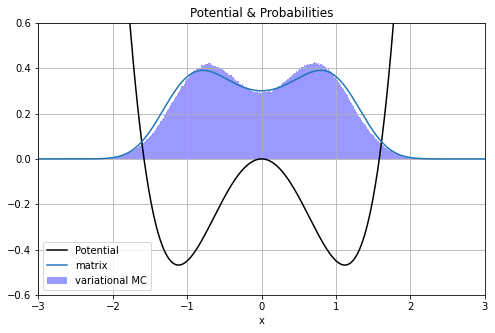

In [5]:
# Plot a few things
#fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plt.figure(figsize=(8,5))
scale = 0.3
bins = np.linspace(-3, 3, num=1000)
plt.hist(
    psi_numerical,
    bins=bins,
    density=True,
    color='blue',
    alpha=0.4,
    label='variational MC'
);
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2,label='matrix')
#plt.plot(x,(psi[1])**2)
#plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

#### Values numerical of H:

The calculation of the GS energy is possible thanks to the positions' distribution sampled and shown in the cell above. Since the metroplis algorithm can sample only probability distribution (i.e. the square modulus of the eigenfunction), it is convenient write the mean value of H as follows:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

The last member of the equation can be sampled and the energy can be calculated.

As explained above, the estimations have been plotted with their relatives errors as function of blocks of 100 estimations each.

In [73]:
ave_H = np.loadtxt(fname = "ave_H.txt")
err_H = np.loadtxt(fname = "err_H.txt")

Numerical ground state energy:  -0.444097


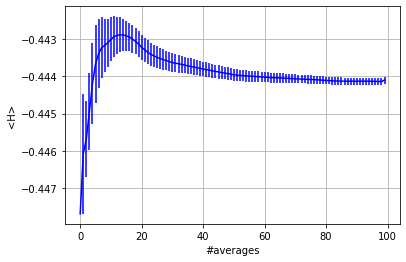

In [76]:
M=10000
N=100
L=int(M/N)
x_H = np.arange(N) 
print("Numerical ground state energy: ", ave_H[N-1])
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x_H,ave_H ,yerr=err_H,color='blue')
plt.xlabel('#averages')
plt.ylabel('<H>')
plt.grid(True)
plt.show()

The estimation of the matrix problem is a bit lower because it has been used a variational method. This is the best I managed to reach.